# Predicting the heart disease or not

## 1.Problem Definition
With the give data we have to predict whether the person is having heart disease or not
## 2.Data Definition
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

DATA LINK:https://archive.ics.uci.edu/dataset/45/heart+disease

Project's goal is to contribute to the development of effective risk stratification tools that can assist healthcare providers in delivering personalized care and improving patient outcomes in the field of cardiology.

Link to CSV FILE : https://docs.google.com/spreadsheets/d/1Wb0LNUOFUY3xeRK4wKSrx-kwmLYRdl8pnRTnaqRRLvc/edit?usp=sharing


Heart disease is a significant public health concern worldwide, contributing to millions of deaths annually. As a student, selecting heart disease prediction as a project topic for an assignment provides an opportunity to delve into a critical area of healthcare and contribute to the advancement of predictive analytics in medicine.

Heart disease encompasses various conditions affecting the heart and blood vessels, including coronary artery disease, heart failure, arrhythmias, and congenital heart defects. Early detection and accurate prediction of heart disease risk factors are crucial for implementing preventive measures and improving patient outcomes.

The project will also explore the ethical implications of using predictive analytics in healthcare, including issues related to data privacy, algorithm transparency, and equitable access to healthcare services. By addressing these concerns, the project aims to develop a robust and ethically responsible predictive model for heart disease prediction.

## 3 Evaluation
We need 95%+ accuracy to pursue with this project
## 4.Features details
We can refer to the data link given above for the features details

## Preparing the tools

In [ ]:
#EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#ModelEvaluation
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

#Saving model
import pickle
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading the data
hd=pd.read_csv("heart-disease.csv")
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# EDA
Basically eda is done to have a basic probability of the heart disease based on individual dimensions/columns.
Vizualization are done so that if we have to present somewhere we can easily explain with the graphs to any non technical person instead of showing just the numbers


In [ ]:

hd["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

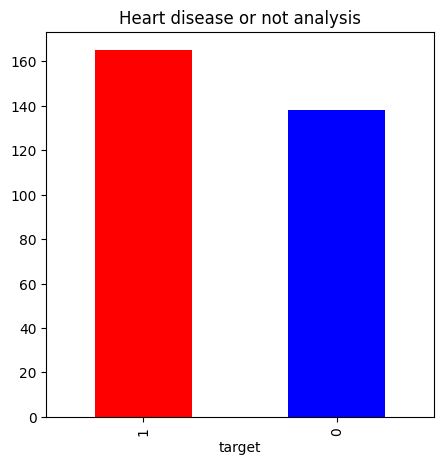

In [ ]:
hd["target"].value_counts().plot(kind='bar',color=['red','blue'],figsize=(5,5))
plt.title("Heart disease or not analysis");

In [ ]:
#To see the dtype of all the columns whether all the columns are in int or float because models are trained on numerical data
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#To find the null values in the data
hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#To check the number of males and females in the data to have a basic overview of the data
hd['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [ ]:
#To check whether the number of male having hd or not and female having hd or not
pd.crosstab(hd.target,hd.sex)

sex,0,1
target,,
0,24,114
1,72,93


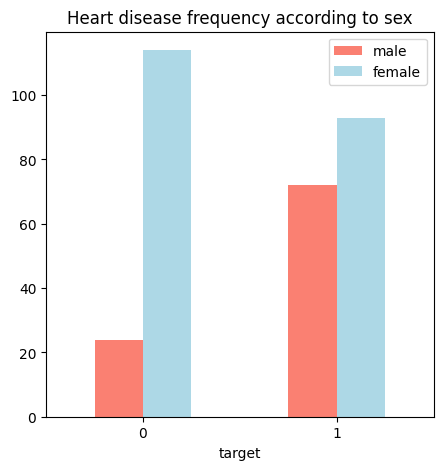

In [ ]:
#Vizualizing the above matrix for better understanding
#Sex 0 is for female and 1 is for male
#Target 0 is not heart disease and 1 for heart disease
pd.crosstab(hd.target,hd.sex).plot(kind='bar',color=['salmon','lightblue'],figsize=(5,5))
plt.title("Heart disease frequency according to sex");
plt.legend(['male','female'])
plt.xticks(rotation=0);

In [ ]:
#Depending upon the chest pain checking whether the person can have probability or not
pd.crosstab(hd.cp,hd.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


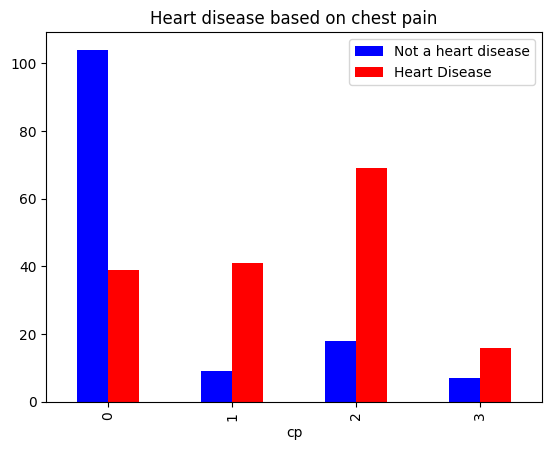

In [ ]:
#Vizualizing the above matrix
pd.crosstab(hd.cp,hd.target).plot(kind='bar',color=['blue','red'])
plt.title("Heart disease based on chest pain")
plt.legend(['Not a heart disease','Heart Disease']);

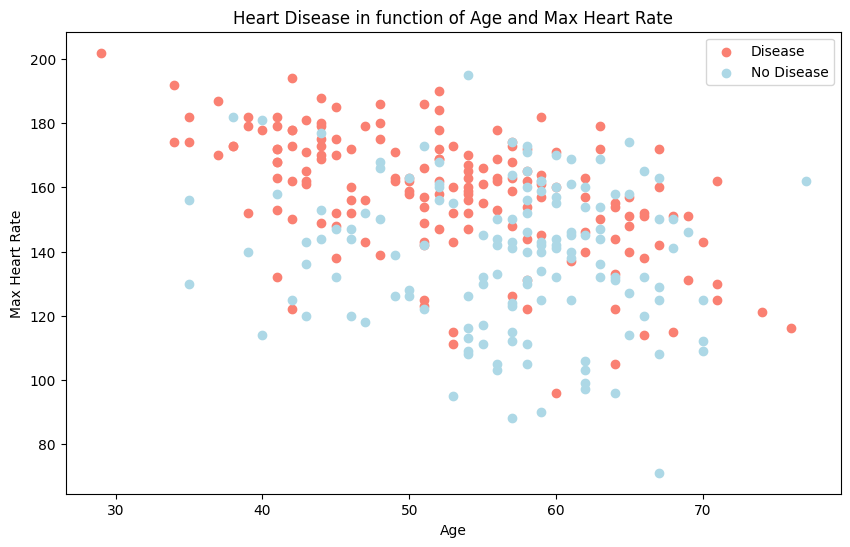

In [ ]:
#Checking the heart rate and checking whether the person can have heart disease or not
plt.figure(figsize=(10, 6))
plt.scatter(hd.age[hd.target==1],
            hd.thalach[hd.target==1],
            c="salmon")
plt.scatter(hd.age[hd.target==0],
            hd.thalach[hd.target==0],
            c="lightblue")
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

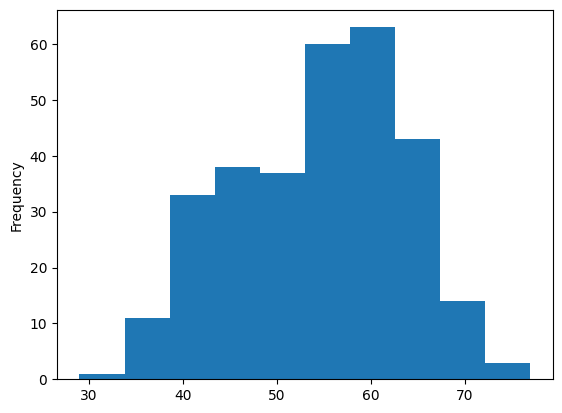

In [ ]:
#Checking whether we have data diversity
hd.age.plot(kind='hist');

In [ ]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#This is done to check the correlation betweeen two dimensions/columns so that if the two columns are highly correlated we can remove one column to increase the accuracy of the model this is also called dimensionality reduction
hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


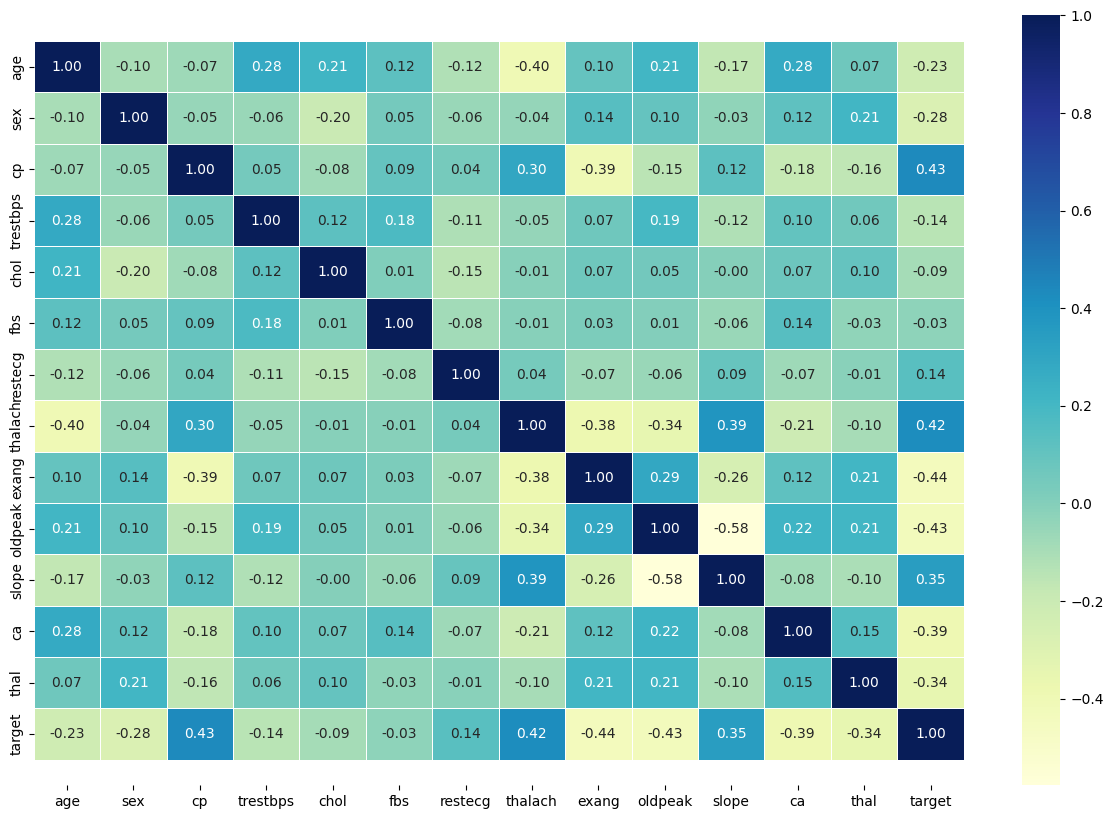

In [ ]:
#Vizualizing the correlation matrix to have better view
corr_matrix=hd.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);